# The Program recommends movies to users based on the movie(s) they already watched and liked.
## The output is the result of various statistical analysis performed, based on the input and datasets

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
ratings = pd.read_csv("./Datasets/ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies= pd.read_csv("./Datasets/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data = pd.merge(ratings, movies, on='movieId')
data.drop(columns=['genres'], inplace=True)
data.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [5]:
data.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp                             title
0            1        1     4.0   964982703                  Toy Story (1995)
1            5        1     4.0   847434962                  Toy Story (1995)
2            7        1     4.5  1106635946                  Toy Story (1995)
3           15        1     2.5  1510577970                  Toy Story (1995)
4           17        1     4.5  1305696483                  Toy Story (1995)
...        ...      ...     ...         ...                               ...
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)
100833     610   160836     3.0  1493844794                     Hazard (2005)
100834     610   163937     3.5  1493848789                Blair Witch (2016)
100835     610   163981     3.5  1493850155                         31 (2016)

[100836 rows x 5 columns]>

In [6]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [7]:
ratings['number_of_ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


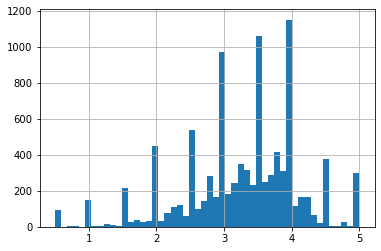

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

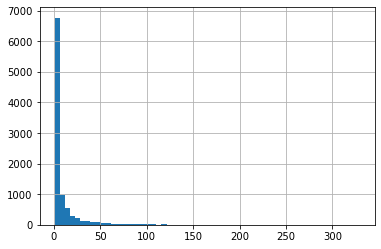

In [9]:
ratings['number_of_ratings'].hist(bins=60)

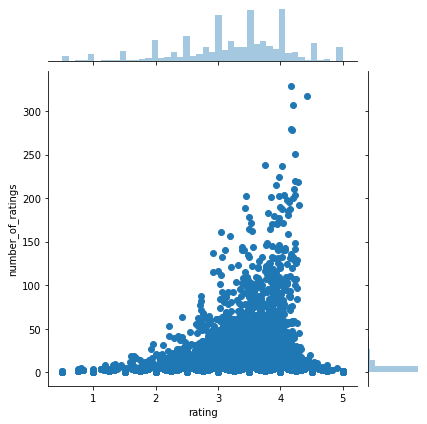

In [11]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [15]:
movie_matrix=data.pivot_table(index='userId', columns='title', values='rating')
movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [20]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [25]:
AFO_user_ratings=movie_matrix['Air Force One (1997)']
contact_user_ratings=movie_matrix['Contact (1997)']
AFO_user_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Air Force One (1997), dtype: float64

In [23]:
contact_user_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Contact (1997), dtype: float64

In [30]:
movies_like_airforce=movie_matrix.corrwith(AFO_user_ratings)
movies_like_airforce.sort_values(ascending=False).head(15)

title
Let It Ride (1989)                    1.0
Larry Crowne (2011)                   1.0
Battlestar Galactica: Razor (2007)    1.0
Be Cool (2005)                        1.0
Andre (1994)                          1.0
Child's Play 2 (1990)                 1.0
Dr. T and the Women (2000)            1.0
Slither (2006)                        1.0
Hairspray (2007)                      1.0
Guarding Tess (1994)                  1.0
Out to Sea (1997)                     1.0
Sniper (1993)                         1.0
Guard, The (2011)                     1.0
Grey Zone, The (2001)                 1.0
Song of the South (1946)              1.0
dtype: float64

In [36]:
FG_user_ratings=movie_matrix['Forrest Gump (1994)']
movies_like_FG=movie_matrix.corrwith(FG_user_ratings)
movies_like_FG.sort_values(ascending=False)

title
Class, The (Klass) (2007)                                                 1.0
The Drop (2014)                                                           1.0
Self/less (2015)                                                          1.0
Killers (2010)                                                            1.0
What the #$*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004)    1.0
                                                                         ... 
Zoom (2015)                                                               NaN
Zulu (2013)                                                               NaN
[REC]³ 3 Génesis (2012)                                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)                    NaN
À nous la liberté (Freedom for Us) (1931)                                 NaN
Length: 9719, dtype: float64

In [40]:
movies_like_contact=movie_matrix.corrwith(contact_user_ratings)
movies_like_contact.sort_values(ascending=False).head()

title
Norma Rae (1979)                             1.0
Batman Beyond: Return of the Joker (2000)    1.0
Stalingrad (1993)                            1.0
Host, The (Gwoemul) (2006)                   1.0
Doom Generation, The (1995)                  1.0
dtype: float64

In [47]:
corr_contact = pd.DataFrame(movies_like_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head(15)

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640
"10,000 BC (2008)",-0.212431
101 Dalmatians (1996),0.327327
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224338
12 Angry Men (1957),0.069711


In [48]:
corr_FG = pd.DataFrame(movies_like_FG, columns=['Correlation'])
corr_FG.dropna(inplace=True)
corr_FG.head(15)

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


In [55]:
corr_FG.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [57]:
corr_contact=corr_contact.join(ratings['number_of_ratings'])
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [60]:
corr_FG[corr_FG['number_of_ratings']>100].sort_values(by='Correlation', ascending=False).head(15)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


In [61]:
corr_contact[corr_contact['number_of_ratings']>100].sort_values(by='Correlation', ascending=False).head(15)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
